In [5]:
# Kolminkertainen eksponentiaalinen tasoitus
# Kolminkertaista eksponentiaalista tasoitusta kutsutaan myös Holt-Winterin malliksi. Eksponentiaalisen tasoituksen 
#mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän 
#ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.
# Holt-Winterin malli huomioi sekä trendin että kausivaihtelun.
# Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [9]:
df=pd.read_excel('Saapuneet puhelut kktasolla.xlsx')
df

,Month,Saapuneet
0,2017-12-01,3714
1,2018-01-01,6185
2,2018-02-01,5615
3,2018-03-01,5381
4,2018-04-01,7284
5,2018-05-01,20116
6,2018-06-01,13238
7,2018-07-01,7594
8,2018-08-01,7968
9,2018-09-01,31344


In [10]:
df.index = pd.to_datetime(df['Month'],format="%Y-%m")
df=df.drop('Month',axis=1)
df

,Saapuneet
Month,
2017-12-01,3714
2018-01-01,6185
2018-02-01,5615
2018-03-01,5381
2018-04-01,7284
2018-05-01,20116
2018-06-01,13238
2018-07-01,7594
2018-08-01,7968


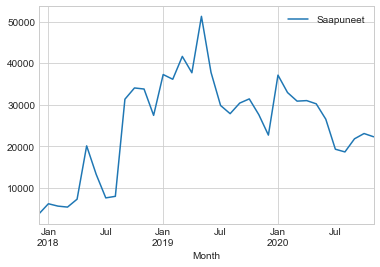

In [11]:
df.plot()

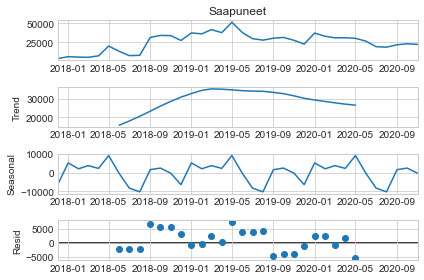

In [12]:
# Aikasarjan vaihtelua aiheuttavien komponenttien erottelu
# Observed=alkuperäinen aikasarja, Trend=trendi, Seasonal=kausivaihtelu,
# Residual=muu kuin trendiin ja kausivaihteluun liittyvä vaihtelu

decompose = seasonal_decompose(df['Saapuneet']).plot()

In [13]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#Trendiin (trend) käytän summamallia (add), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.
#Kausivaihteluun (seasonal) käytän summamallia (add) tai tulomallia (mul). Tulomallissa kausivaihtelu ilmenee kertoimina. Tässä olen kokeillut myös summamallia, mutta tulomalli osoittautui paremmaksi.
#seasonal_periods-parametrille käytän arvoa 5, koska kausivaihtelu esiintyy viiden kuukauden jaksoissa.
#freq-parametrille käytän arvoa 'MS', koska kyseessä ovat kuukauden ensimmäiset päivät. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', seasonal = 'mul', 
                             seasonal_periods = 5, freq='MS').fit()

In [14]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Saapuneet,Ennuste
Month,,
2017-12-01,3714,4646.300967
2018-01-01,6185,3955.178366
2018-02-01,5615,6341.334488
2018-03-01,5381,5739.472687
2018-04-01,7284,5530.251008
2018-05-01,20116,8157.846093
2018-06-01,13238,16707.870421
2018-07-01,7594,15018.704382
2018-08-01,7968,8927.666681


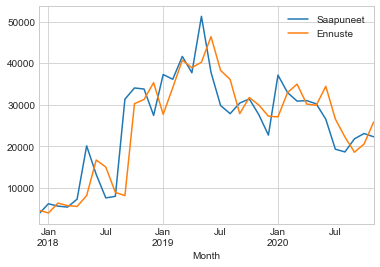

In [16]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [17]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Ennuste,Ennustevirhe
Month,,,
2017-12-01,3714,4646.300967,-932.300967
2018-01-01,6185,3955.178366,2229.821634
2018-02-01,5615,6341.334488,-726.334488
2018-03-01,5381,5739.472687,-358.472687
2018-04-01,7284,5530.251008,1753.748992
2018-05-01,20116,8157.846093,11958.153907
2018-06-01,13238,16707.870421,-3469.870421
2018-07-01,7594,15018.704382,-7424.704382
2018-08-01,7968,8927.666681,-959.666681


Text(0, 0.5, 'Ennustevirhe')

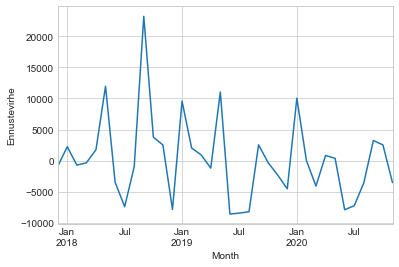

In [18]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

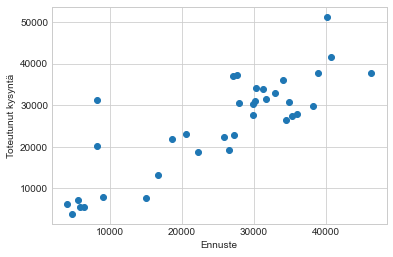

In [19]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Saapuneet'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [20]:
malli.summary()

Dep. Variable:,endog,No. Observations:,36
Model:,ExponentialSmoothing,SSE,1583191905.285
Optimized:,True,AIC,651.571
Trend:,Additive,BIC,665.823
Seasonal:,Multiplicative,AICC,662.571
Seasonal Periods:,5,Date:,"Thu, 28 Jan 2021"
Box-Cox:,False,Time:,15:37:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7897958,alpha,True
smoothing_slope,5.882e-11,beta,True


In [21]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Ennuste,Ennustevirhe
Month,,,
2020-07-01,19309,26571.693875,-7262.693875
2020-08-01,18656,22241.802186,-3585.802186
2020-09-01,21814,18580.701503,3233.298497
2020-10-01,23083,20565.325303,2517.674697
2020-11-01,22302,25844.760270,-3542.760270


In [22]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-12-01', periods = 12, freq = 'MS')

# Ennusteet 12 kuukaudelle
ennusteet = malli.forecast(12)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2020-12-01,21778.593082
2021-01-01,23233.460836
2021-02-01,22179.944662
2021-03-01,21568.045352
2021-04-01,24729.909774
2021-05-01,23346.284575
2021-06-01,24882.142816
2021-07-01,23731.842511
2021-08-01,23056.303273
2021-09-01,26413.116315


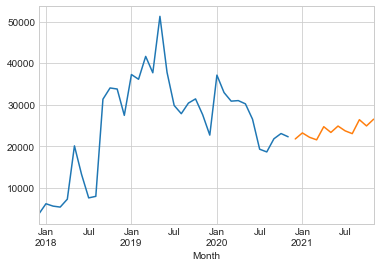

In [24]:
# Viivakaavio havainnoista
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [25]:
# Dataframe, jossa alkuperäinen aikasarja ja lasketut ennusteet
df1 = pd.concat([df, df_ennuste])
df1

,Saapuneet,Ennuste,Ennustevirhe
2017-12-01,3714.0,4646.300967,-932.300967
2018-01-01,6185.0,3955.178366,2229.821634
2018-02-01,5615.0,6341.334488,-726.334488
2018-03-01,5381.0,5739.472687,-358.472687
2018-04-01,7284.0,5530.251008,1753.748992
2018-05-01,20116.0,8157.846093,11958.153907
2018-06-01,13238.0,16707.870421,-3469.870421
2018-07-01,7594.0,15018.704382,-7424.704382
2018-08-01,7968.0,8927.666681,-959.666681
2018-09-01,31344.0,8132.355035,23211.644965
